# Load Packages

In [301]:
#load main packages
import pandas as pd
print("pandas version: {}". format(pd.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 


pandas version: 0.24.2
NumPy version: 1.16.2
SciPy version: 1.2.1


In [302]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


In [303]:
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import preprocessing
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


scikit-learn version: 0.20.3


### Load Datasets and Preview

In [304]:
# Load in the train and test datasets

train = pd.read_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/train.csv')
test = pd.read_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/test.csv')

#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
#train_copy = train.copy(deep = True)

In [305]:
#preview
#train.info()
# train.describe()

In [306]:
#train.describe(include=['O'])
# анализируем только строковые переменные, 
# см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [307]:
train.columns.values
#train.index.values   #rows

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [308]:
train.shape

(891, 12)

In [309]:
test.shape

(418, 11)

In [310]:
#train.head(1)

In [311]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [312]:
train.groupby(['Sex','Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [313]:
train[['Pclass', 'Survived']].groupby(['Pclass'], 
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [314]:
train[["Sex", "Survived"]].groupby(['Sex'], 
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Data Cleaning (=Data Pre-processing)

Developer Documentation:

pandas.DataFrame
pandas.DataFrame.info
pandas.DataFrame.describe
Indexing and Selecting Data
pandas.isnull
pandas.DataFrame.sum
pandas.DataFrame.mode
pandas.DataFrame.copy
pandas.DataFrame.fillna
pandas.DataFrame.drop
pandas.Series.value_counts
pandas.DataFrame.loc

In [315]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [316]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [317]:
#train['Age']

In [318]:
m=train['Age'].median()
m

28.0

In [319]:
train['Age'].fillna(m,inplace=True)
#train['Age']

In [320]:
m2=test['Age'].median()
test['Age'].fillna(m2,inplace=True)

In [321]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train['FamilySize']=train['SibSp']+train['Parch']+1

In [322]:
train['IsAlone']=0
for k in train.index:
    if train['FamilySize'].values[k]==1:
        train['IsAlone'].values[k]=1

In [323]:
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

test['FamilySize']=test['SibSp']+test['Parch']+1

In [324]:
test['IsAlone']=0
for k in test.index:
    if test['FamilySize'].values[k]==1:
        test['IsAlone'].values[k]=1

In [325]:
#train.info()

In [326]:
train.drop(['Name','Ticket','Embarked','Cabin'],axis=1,inplace=True)

In [327]:
train['Sex'].replace('male','1',inplace=True)
train['Sex'].replace('female','0',inplace=True)
train['Sex']=train['Sex'].astype(int)

In [328]:
train['FareBin'] = pd.qcut(train['Fare'], 4)
train['AgeBin'] = pd.cut(train['Age'], 5)

In [329]:
train['Age']=train['Age'].astype(int)

In [330]:
test.drop(['Name','Ticket','Embarked','Cabin'],axis=1,inplace=True)

In [331]:
test['Sex'].replace('male','1',inplace=True)
test['Sex'].replace('female','0',inplace=True)
test['Sex']=test['Sex'].astype(int)

In [332]:
test['FareBin'] = pd.qcut(test['Fare'], 4)
# делим на 4 промежутка - квартиля (в каждый попадает четверть значений)
test['AgeBin'] = pd.cut(test['Age'], 5)  
# делим на 5 равных промежутков

In [333]:
test['Age']=test['Age'].astype(int)
w=test['Fare'].median()
test['Fare'].fillna(w,inplace=True)

#### Итоговое описание данных

In [334]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Has_Cabin', 'FamilySize', 'IsAlone', 'FareBin',
       'AgeBin'], dtype=object)

In [335]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Has_Cabin      891 non-null int64
FamilySize     891 non-null int64
IsAlone        891 non-null int64
FareBin        891 non-null category
AgeBin         891 non-null category
dtypes: category(2), float64(1), int32(2), int64(8)
memory usage: 71.6 KB


In [336]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.345679,0.523008,0.381594,32.204208,0.228956,1.904602,0.602694
std,257.353842,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057,49.693429,0.420397,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,1.000000


##### Входящие переменные (данные):
- Pclass: порядковый тип, значения {1, 2, 3}
- Sex: бинарный тип, значения {0 <female>, 1 <male>}
- Age: количественный тип, целочисленные значения от 0 до 80
- SibSp: количественный тип, целочисленные значения от 0 до 8
- Parch: количественный тип, целочисленные значения от 0 до 6
- Fare: количественный тип, вещественные значения от 0 до 512.3292
- Has_Cabin: бинарный тип, значения {0 <нет>, 1 <да>}
- FamilySize: количественный тип, целочисленные значения от 1 до 11
- IsAlone: бинарный тип, значения {0 <нет>, 1 <да>}
- FareBin: номинальный тип, класс object, диапазоны значений 
{(-0.001, 7.91],(7.91, 14.454],(14.454, 31.0],(31.0, 512.329]}
- AgeBin: номинальный тип, класс object, диапазоны значений
{(0.34, 16.336],(16.336, 32.252],(32.252, 48.168],(48.168, 64.084],(64.084, 80.0]}

In [337]:
#train['FareBin']

### Корреляционный анализ

In [338]:
A=train[['Survived','Pclass','Age','Sex','Fare','FamilySize']]

In [339]:
A.corr(method='pearson',min_periods=50)

,Survived,Pclass,Age,Sex,Fare,FamilySize
Survived,1.000000,-0.338481,-0.064909,-0.543351,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.339999,0.131900,-0.549500,0.065997
Age,-0.064909,-0.339999,1.000000,0.080750,0.096838,-0.245593
Sex,-0.543351,0.131900,0.080750,1.000000,-0.182333,-0.200988
Fare,0.257307,-0.549500,0.096838,-0.182333,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.245593,-0.200988,0.217138,1.000000


In [340]:
A.corr(method='spearman',min_periods=50)

,Survived,Pclass,Age,Sex,Fare,FamilySize
Survived,1.000000,-0.339668,-0.036091,-0.543351,0.323736,0.165463
Pclass,-0.339668,1.000000,-0.318184,0.135775,-0.688032,-0.075698
Age,-0.036091,-0.318184,1.000000,0.066923,0.126632,-0.182436
Sex,-0.543351,0.135775,0.066923,1.000000,-0.259593,-0.292035
Fare,0.323736,-0.688032,0.126632,-0.259593,1.000000,0.528907
FamilySize,0.165463,-0.075698,-0.182436,-0.292035,0.528907,1.000000


##### Вывод: 1) Есть средняя корреляция между параметрами Survived и Sex. Вероятность выжить у женщин больше 2) Есть умеренная корреляция между параметрами Survived и Pclass. Вероятность выжить у пассажиров более высокого класса больше

In [341]:
Total_Passengers_train=len(train['PassengerId'])
Total_Survived_train=train['Survived'].sum()
Percentage_Survived_train=(Total_Survived_train/Total_Passengers_train)*100
Percentage_Survived_train #процент выживших в обучающей выборке

38.38383838383838

In [342]:
M=train.groupby(['Sex','Survived'])['PassengerId'].count()
M

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: PassengerId, dtype: int64

In [343]:
P_male_survive=M[1][1]/(M[1][0]+M[1][1])
P_female_survive=M[0][1]/(M[0][0]+M[0][1])

In [344]:
P_male_survive #вероятность выжить для мужчины (согласно обучающей выборке)

0.18890814558058924

In [345]:
P_female_survive  #вероятность выжить для женщины

0.7420382165605095

### Метод K ближайших соседей

##### Data normalization

In [346]:
train_copy = train.copy(deep = True)
test_copy = test.copy(deep = True)

In [347]:
X_train_kgl = train_copy[['Age','Fare','FamilySize','Sex']]
X_test_kgl = test_copy[['Age','Fare','FamilySize','Sex']]
y_train_kgl = train_copy['Survived'].values
X_train_kgl = (X_train_kgl - X_train_kgl.min(axis=0)) / (X_train_kgl.max(axis=0) - X_train_kgl.min(axis=0))
X_test_kgl = (X_test_kgl - X_test_kgl.min(axis=0)) / (X_test_kgl.max(axis=0) - X_test_kgl.min(axis=0))

In [348]:
#X2 = preprocessing.StandardScaler().fit(X2).transform(X2.astype(float))

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=4)

In [350]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
        
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
   
mean_acc

array([0.80446927, 0.7877095 , 0.81564246, 0.81005587, 0.80446927,
       0.80446927, 0.79329609, 0.81005587, 0.79888268])

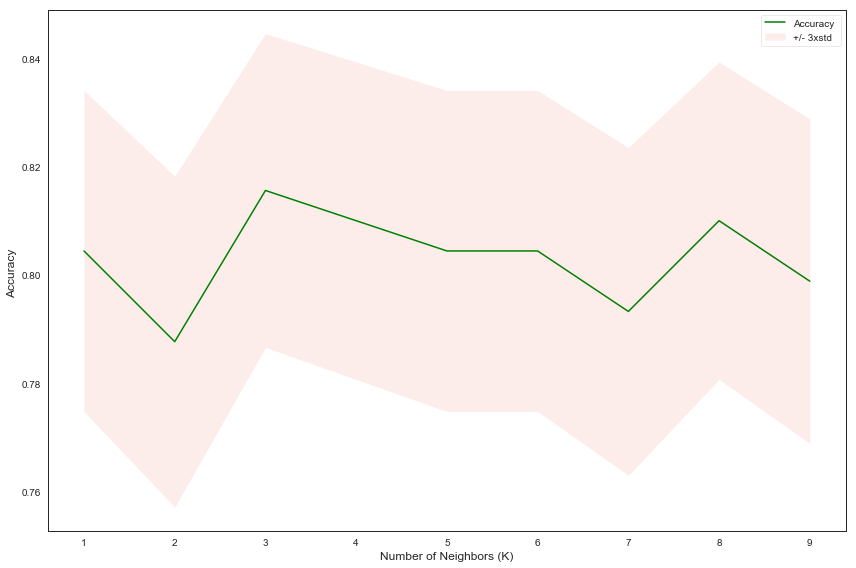

In [351]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [352]:
k = 3
neigh_opt = KNeighborsClassifier(n_neighbors = 3).fit(X_train_kgl,y_train_kgl)
yhat_opt = neigh_opt.predict(X_test_kgl)

In [353]:
yhat_opt

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

#### Представление итоговых данных

In [354]:
A = test_copy[['PassengerId']]

In [359]:
B = pd.DataFrame(yhat_opt)
answer = A.join(B)
answer.columns = ['PassengerId','Survived']

In [356]:
answer.to_csv('D:/soft/anaconda3/axpavlov_files/Kaggle_Titanic/answer.csv', index=False)